In [1]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from scipy.optimize import curve_fit

## Basic Monte Carlo Integration

As in the first exercise, we can use Monte Carlo quadrature to calculate the following integral by sampling a uniform distribution. 

$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$

$I\simeq G_N = \frac{1}{N} \sum_{i=1}^N g(x_i)$

But if we sample from a distribution that is more similar to the integrand, then we expect faster convergence. 

$I \simeq G_N = \frac{1}{N} \sum_{i=1}^N \frac{g(x_i)}{d(x_i)},$ with $x_i$ from $d(x)$.

Chosen distribution : $d_1(x) = 2 - 2x $

As a fun exercise I also tried choosing a distribution that is **dissimilar** to the integrand, expecting slower convergence. I called this "un-importance sampling."

Chosen distribution : $d_2(x) = 2x $

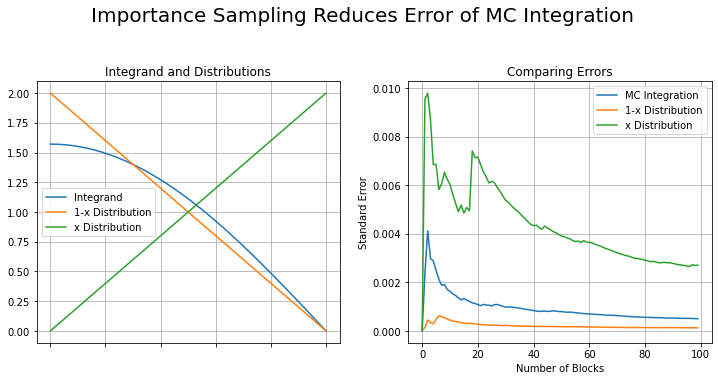

Basic : 0.000501266
Importance : 0.000128057
Un-Importance  : 0.00270755


In [28]:
err_MC = np.loadtxt("./data/basic_sampling.dat", usecols=(2), delimiter=" ", unpack="true")
err_IS = np.loadtxt( "./data/importance_sampling.dat", usecols=(2), delimiter=" ", unpack="true")
err_US = np.loadtxt("./data/unimportance_sampling.dat", usecols=(2), delimiter=" ", unpack="true")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle("Importance Sampling Reduces Error of MC Integration", fontsize=20, y=1.05)

x = np.arange(100)
axes[1].title.set_text("Comparing Errors")
axes[1].plot(x, err_MC, label="MC Integration")
axes[1].plot(x, err_IS, label="1-x Distribution")
axes[1].plot(x, err_US, label="x Distribution")
axes[1].set_ylabel("Standard Error")
axes[1].set_xlabel("Number of Blocks")
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

x = np.linspace(0, 1, 100)
y1 = (np.pi / 2) * np.cos((np.pi / 2) * x)
y2 = 2 * (1 - x)
y3 = 2 * x

axes[0].title.set_text("Integrand and Distributions")
axes[0].plot(x, y1, label="Integrand")
axes[0].plot(x, y2, label="1-x Distribution")
axes[0].plot(x, y3, label="x Distribution")
axes[0].legend()
axes[0].grid(True)
axes[0].xaxis.set_ticklabels([])
plt.show()

print("Basic :", err_MC[99])
print("Importance :", err_IS[99])   
print("Un-Importance  :", err_US[99])

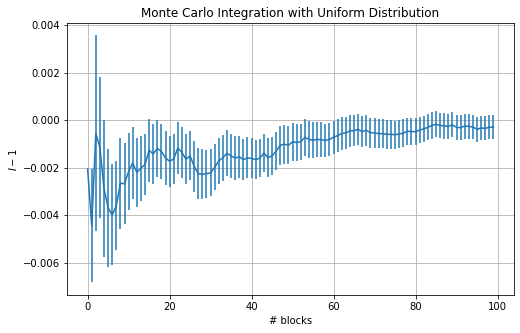

In [17]:
datafile = "./data/basic_sampling.dat"
I, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

N = 100  # Blocks

x = np.arange(N)
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.errorbar(x, I - 1, yerr=err)

plt.xlabel("# blocks")
plt.ylabel(r"$I- 1 $ ")
plt.title("Monte Carlo Integration with Uniform Distribution")
# plt.savefig('./figures/2.1.1.png')
plt.show()

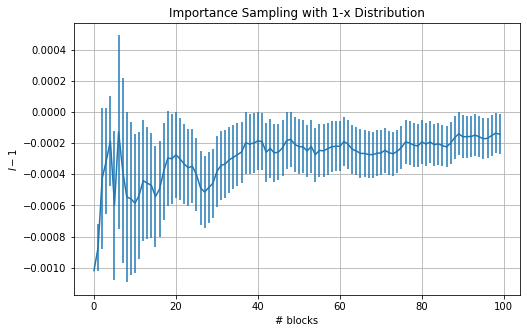

(0.999857, 0.000128057)

In [16]:
datafile = "./data/importance_sampling.dat"
I, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

N = 100  # Blocks

x = np.arange(N)
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.errorbar(x, I - 1, yerr=err)

plt.xlabel("# blocks")
plt.ylabel(r"$I- 1 $ ")
plt.title("Importance Sampling with 1-x Distribution")
# plt.savefig('./figures/2.1.2.png')
plt.show()

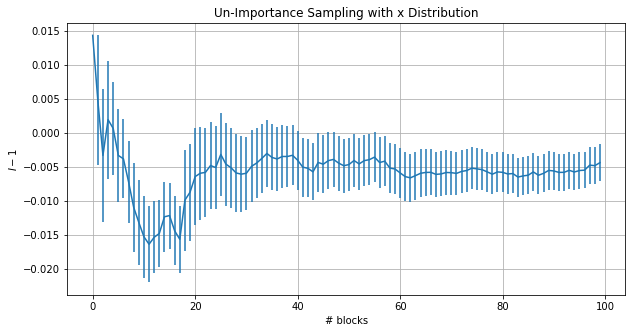

(0.995579, 0.00270755)

In [4]:
datafile = "./data/unimportance_sampling.dat"
I, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

N = 100  # Blocks

x = np.arange(N)
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, I - 1, yerr=err)

plt.xlabel("# blocks")
plt.ylabel(r"$I- 1 $ ")
plt.title("Un-Importance Sampling with x Distribution")
# plt.savefig('./figures/2.1.3.png')
plt.show()

I[99], err[99]

### Random Walk

These experiments simulate random walks on a lattice and on a continuum using custom-built random number generators using. 

The result of the simulation is a plot of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ and its error over many random walks and over $100$ experiments for each random walk.

We should expect that the root-mean-square displacement go as $\sqrt{N}$.

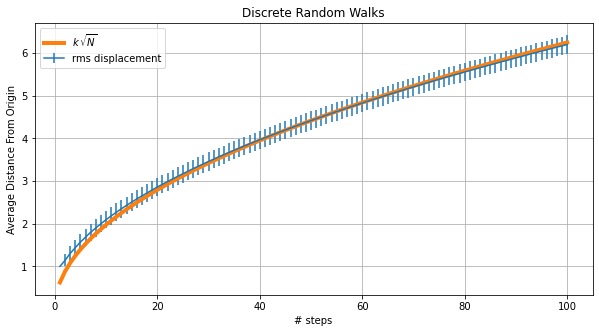

In [26]:
def f(x, k):  # defining the fitting function
    return k * np.sqrt(x)

dist, err = np.loadtxt("./data/rw_lattice.dat", usecols=(0, 2), delimiter=" ", unpack="true")

n_walks = 100
n_steps = 10000

x = np.arange(n_walks) + 1
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, dist, yerr=err, label='rms displacement')

p_opt, p_cov = curve_fit(f, x, dist, bounds=(-5, 5))
y_fit = f(x, p_opt)
plt.plot(x, y_fit, lw=4, label=r'$k \, \sqrt{N}$')  # plotting fitted function

plt.xlabel("# steps")
plt.ylabel("Average Distance From Origin")
plt.title("Discrete Random Walks")
plt.legend()
plt.show()

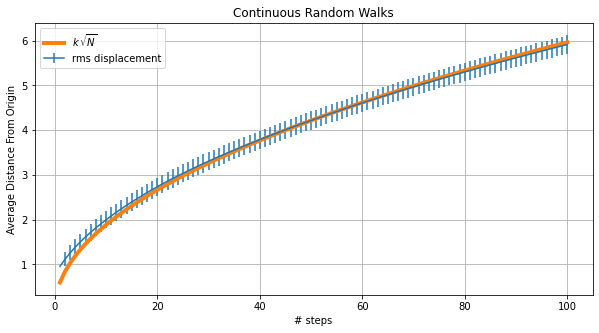

In [27]:
datafile = "./data/rw_continuum.dat"
dist, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

n_walks = 100
n_steps = 10000

x = np.arange(n_walks) + 1
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, dist, yerr=err, label='rms displacement')

p_opt, p_cov = curve_fit(f, x, dist, bounds=(-5, 5))
y_fit = f(x, p_opt)
plt.plot(x, y_fit, lw=4, label=r'$k \, \sqrt{N}$')  # plotting fitted function

plt.xlabel("# steps")
plt.ylabel("Average Distance From Origin")
plt.title("Continuous Random Walks")
plt.legend()
plt.show()